# Serial Interval

The serial interval also known as Transmission Dynamics is the time between the onset of symptoms in an infected person and the onset of symptoms in a person they infect.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

# Define the path to your text file
file_path = './Data/twitter16/label.txt'

# Initialize empty lists to store the data
labels = []
values = []

# Read the file line by line and extract the data
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()  # Remove any leading/trailing whitespace
        label, value = line.split(':')  # Split the line into label and value
        labels.append(label)
        values.append(int(value))  # Convert the value to an integer

# Create a DataFrame from the lists
df = pd.DataFrame({'Label': labels, 'SourceTweetID': values})

# Optionally, you can filter the DataFrame based on specific labels:
#df_filtered = df[df['Label'].isin(['true', 'false'])]
df = df[df['Label'].isin(['true', 'false'])]
df_filtered =df.copy()

df_filtered['Label'] = df['Label'].str.lower().replace({'true': True, 'false': False})

distinct_labels = df['Label'].unique()
print(distinct_labels)

# Display the DataFrame
df_filtered


['false' 'true']


,Label,SourceTweetID
0,False,656955120626880512
1,True,615689290706595840
2,False,613404935003217920
5,True,614467824313106432
9,False,622891631293935616
...,...,...
799,True,552806757672964097
801,True,544350567183556608
805,True,614593386188828672
811,True,650046859537448960


In [2]:


#df_filtered['Label']=df_filtered['Label'].astype(bool)
df_filtered_dict = df_filtered.set_index('SourceTweetID')['Label'].to_dict()
df_filtered_dict[656955120626880512]
# bool(dict_of_lists[656955120626880512])

False

## Getting Maximum Length Of Rumors That Is True For Twitter 16

In [3]:
rumor_tweet_id= df_filtered['SourceTweetID'].unique()

In [4]:
import os
import pandas as pd

# Define the path to your folder containing files
folder_path ='./Data/twitter16/tree' #'./Data/testtree'


# Initialize empty lists to store the extracted data
sender_uid = []
sender_tweet_id = []
sender_post_time_delay = []
receiver_uid = []
receiver_tweet_id = []
receiver_post_time_delay = []
tweet_label=[]
counter=0
# Iterate through the files in the folder
for filename in os.listdir(folder_path):
#     counter=counter+1
#     if counter>10000:
#         break
    file_path = os.path.join(folder_path, filename)
    if int(filename.replace(".txt","")) in rumor_tweet_id: 
        #print(filename.replace(".txt","") ,' is present')
            # Open and read each file
        with open(file_path, 'r') as file:
            for line in file:
                # Split the line to extract the sender and receiver data
                sender_data, receiver_data = line.strip().split('->')

                sender_values = sender_data.strip('[]').replace("'", "").split(', ')
                receiver_values = receiver_data.strip('[]').replace("'", "").split(', ')

                if sender_values[1] ==str(filename.replace(".txt","")):
                    sender_uid.append(sender_values[0])
                    sender_tweet_id.append(sender_values[1])
                    sender_post_time_delay.append(float(sender_values[2]))

                    receiver_uid.append(receiver_values[0])
                    receiver_tweet_id.append(receiver_values[1])
                    receiver_post_time_delay.append(float(receiver_values[2]))

                    #print(int(filename.replace(".txt","")))
                    tweet_label.append(df_filtered_dict[int(filename.replace(".txt",""))])
    #else: 
        #print(filename.replace(".txt","") ,' is NOT present')
    
    


# Create a DataFrame from the extracted data
df_Joined = pd.DataFrame({
    'sender_uid': sender_uid,
    'sender_tweet_id': sender_tweet_id,
    'sender_post_time_delay': sender_post_time_delay,
    'receiver_uid': receiver_uid,
    'receiver_tweet_id': receiver_tweet_id,
    'receiver_post_time_delay': receiver_post_time_delay,
    'tweet_label':tweet_label
})
df_Joined = df_Joined[df_Joined['sender_uid'] != 'ROOT']
# Print the DataFrame
df_Joined

,sender_uid,sender_tweet_id,sender_post_time_delay,receiver_uid,receiver_tweet_id,receiver_post_time_delay,tweet_label
0,24165761,498430783699554305,0.0,33164207,498430783699554305,0.30,True
1,24165761,498430783699554305,0.0,203957378,498430783699554305,1.00,True
2,24165761,498430783699554305,0.0,475947737,498430783699554305,1.00,True
3,24165761,498430783699554305,0.0,367810627,498430783699554305,2.70,True
4,24165761,498430783699554305,0.0,144351126,498430783699554305,2.85,True
...,...,...,...,...,...,...,...
159034,972651,681767380305985536,0.0,34294546,681767380305985536,626.48,False
159035,972651,681767380305985536,0.0,19058535,681767380305985536,1644.97,False
159036,972651,681767380305985536,0.0,20732140,681767380305985536,2088.33,False
159037,972651,681767380305985536,0.0,2185248516,681767380305985536,2121.45,False


In [5]:
# Group by 'receiver_tweet_id' and find the index of the minimum 'delay' in each group
idx = df_Joined.groupby('sender_tweet_id')['receiver_post_time_delay'].idxmin()

# Use the index to select the rows with the smallest delay for each 'receiver_tweet_id'
df_earliest =df_Joined.loc[idx]
df_earliest=df_earliest.sort_values(by='receiver_post_time_delay')
df_earliest = df_earliest.reset_index(drop=True)
df_earliest.tail(100)

,sender_uid,sender_tweet_id,sender_post_time_delay,receiver_uid,receiver_tweet_id,receiver_post_time_delay,tweet_label
312,17471979,616765822095261700,0.0,3250200072,616765822095261700,1.23,True
313,42407972,544515538383564801,0.0,25333609,544515538383564801,1.23,True
314,1767741,672180526946656256,0.0,100531396,672180526946656256,1.27,False
315,23995748,613425834301485056,0.0,214686654,613425834301485056,1.28,False
316,2884771,614638036593299456,0.0,128101784,614638036593299456,1.28,True
...,...,...,...,...,...,...,...
407,3005335703,651321040119963648,0.0,3532804813,651321040119963648,150.58,False
408,2301512587,633823543541768192,0.0,45153143,633823543541768192,167.65,False
409,3332044263,674014933235859456,0.0,58208753,674067439198470144,208.63,False
410,343051698,620916279608651776,0.0,480444339,620916279608651776,249.28,False


In [6]:
# Set options to display all rows and columns
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# df_earliest=df_earliest.head(400)
# df_earliest
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')
df_earliest=df_earliest[ (df_earliest['receiver_post_time_delay']>=0) & (df_earliest['receiver_post_time_delay']<6)]

df_earliest

,sender_uid,sender_tweet_id,sender_post_time_delay,receiver_uid,receiver_tweet_id,receiver_post_time_delay,tweet_label
0,5402612,580348081100734464,0.00,5402612,580348081100734464,0.00,True
1,5695632,628319096606732290,0.00,5695632,628319096606732290,0.00,True
2,88944711,524995771587108864,0.00,88944711,524995771587108864,0.00,True
3,3876769893,651402689352351744,58.43,30973,651402689352351744,0.00,False
4,1297418582,672902686380003328,0.00,1297418582,672902686380003328,0.00,False
...,...,...,...,...,...,...,...
384,343051698,618449248179191808,0.00,611284879,618450505224818688,5.00,False
385,885733974,641972184412327937,0.00,2720359345,641972184412327937,5.00,True
386,16041234,661229627734667264,0.00,3051478771,661230893412032514,5.03,False
387,251881119,675490515748425728,0.00,447689484,675490515748425728,5.12,True


In [7]:
df_earliest['tweet_label'].value_counts()

True     206
False    183
Name: tweet_label, dtype: int64

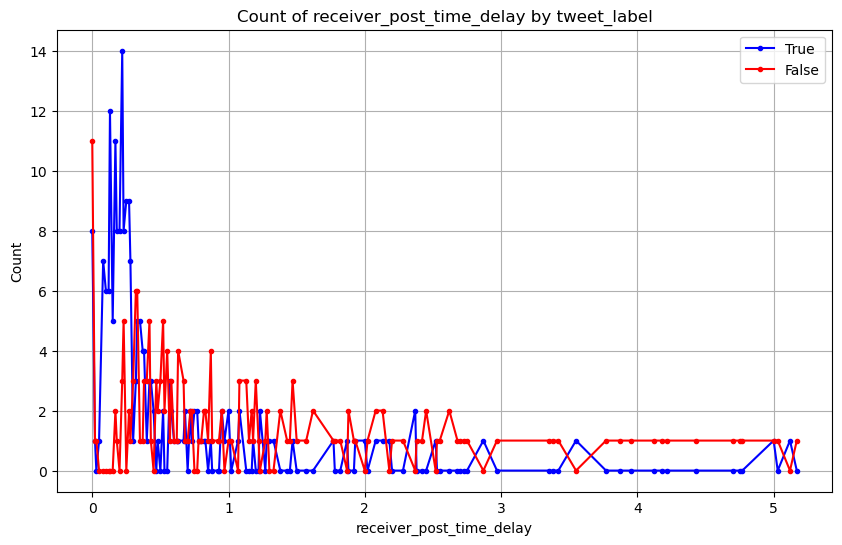

In [8]:
grouped = df_earliest.groupby('tweet_label')['receiver_post_time_delay'].value_counts().unstack(fill_value=0)
plt.figure(figsize=(10, 6))

# Plot for True values
plt.plot(grouped.loc[True].index, grouped.loc[True], marker='.', label='True', color='blue')

# Plot for False values
plt.plot(grouped.loc[False].index, grouped.loc[False], marker='.', label='False', color='red')

plt.xlabel('receiver_post_time_delay')
plt.ylabel('Count')
plt.title('Count of receiver_post_time_delay by tweet_label')
plt.legend()
plt.grid(True)

plt.show()



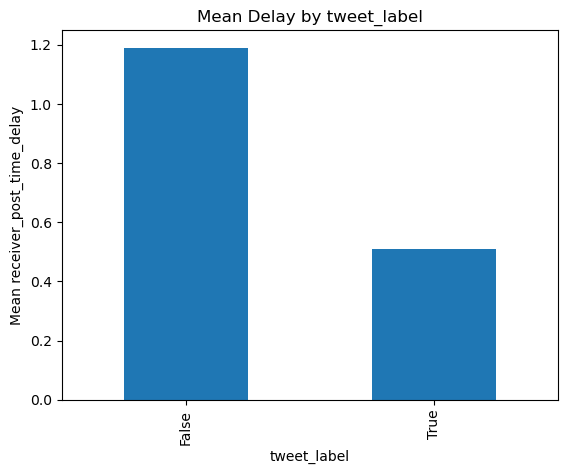

In [9]:
grouped = df_earliest.groupby('tweet_label')['receiver_post_time_delay'].mean()
grouped.plot(kind='bar')
plt.xlabel('tweet_label')
plt.ylabel('Mean receiver_post_time_delay')
plt.title('Mean Delay by tweet_label')
plt.show()

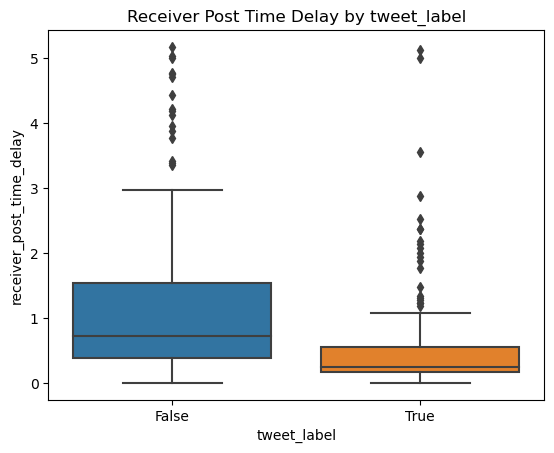

In [10]:
import seaborn as sns

sns.boxplot(x='tweet_label', y='receiver_post_time_delay', data=df_earliest)
plt.xlabel('tweet_label')
plt.ylabel('receiver_post_time_delay')
plt.title('Receiver Post Time Delay by tweet_label')
plt.show()

C:\Users\sanja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


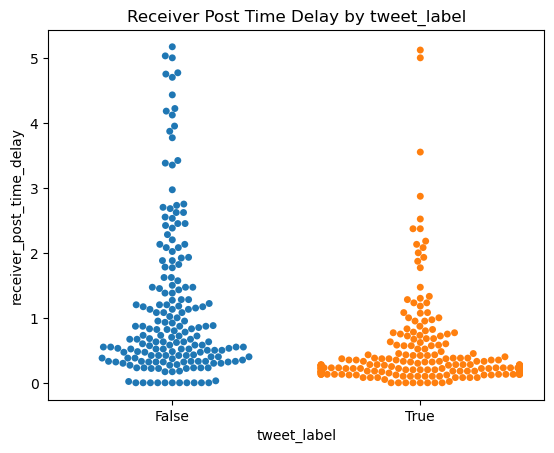

In [11]:
sns.swarmplot(x='tweet_label', y='receiver_post_time_delay', data=df_earliest)
plt.xlabel('tweet_label')
plt.ylabel('receiver_post_time_delay')
plt.title('Receiver Post Time Delay by tweet_label')
plt.show()

# Twitter 15

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

# Define the path to your text file
file_path = './Data/twitter15/label.txt'

# Initialize empty lists to store the data
labels = []
values = []

# Read the file line by line and extract the data
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()  # Remove any leading/trailing whitespace
        label, value = line.split(':')  # Split the line into label and value
        labels.append(label)
        values.append(int(value))  # Convert the value to an integer

# Create a DataFrame from the lists
df = pd.DataFrame({'Label': labels, 'SourceTweetID': values})

# Optionally, you can filter the DataFrame based on specific labels:
#df_filtered = df[df['Label'].isin(['true', 'false'])]
df = df[df['Label'].isin(['true', 'false'])]
df_filtered =df.copy()

df_filtered['Label'] = df['Label'].str.lower().replace({'true': True, 'false': False})

distinct_labels = df['Label'].unique()
print(distinct_labels)

# Display the DataFrame
df_filtered


['true' 'false']


,Label,SourceTweetID
4,True,551099691702956032
7,True,514106273852174337
9,False,495366618818830336
10,False,532206910796468224
11,False,560187970389819392
...,...,...
1480,True,528242965915779072
1481,True,407205235682050048
1482,True,508002575858561024
1484,True,427780584979836929


In [13]:


#df_filtered['Label']=df_filtered['Label'].astype(bool)
df_filtered_dict = df_filtered.set_index('SourceTweetID')['Label'].to_dict()
# df_filtered_dict[656955120626880512]
# # bool(dict_of_lists[656955120626880512])

## Getting Maximum Length Of Rumors That Is True For Twitter 15

In [14]:
rumor_tweet_id= df_filtered['SourceTweetID'].unique()

In [15]:
import os
import pandas as pd

# Define the path to your folder containing files
folder_path ='./Data/twitter15/tree' #'./Data/testtree'


# Initialize empty lists to store the extracted data
sender_uid = []
sender_tweet_id = []
sender_post_time_delay = []
receiver_uid = []
receiver_tweet_id = []
receiver_post_time_delay = []
tweet_label=[]
counter=0
# Iterate through the files in the folder
for filename in os.listdir(folder_path):
#     counter=counter+1
#     if counter>10000:
#         break
    file_path = os.path.join(folder_path, filename)
    if int(filename.replace(".txt","")) in rumor_tweet_id: 
        #print(filename.replace(".txt","") ,' is present')
            # Open and read each file
        with open(file_path, 'r') as file:
            for line in file:
                # Split the line to extract the sender and receiver data
                sender_data, receiver_data = line.strip().split('->')

                sender_values = sender_data.strip('[]').replace("'", "").split(', ')
                receiver_values = receiver_data.strip('[]').replace("'", "").split(', ')

                if sender_values[1] ==str(filename.replace(".txt","")):
                    sender_uid.append(sender_values[0])
                    sender_tweet_id.append(sender_values[1])
                    sender_post_time_delay.append(float(sender_values[2]))

                    receiver_uid.append(receiver_values[0])
                    receiver_tweet_id.append(receiver_values[1])
                    receiver_post_time_delay.append(float(receiver_values[2]))

                    #print(int(filename.replace(".txt","")))
                    tweet_label.append(df_filtered_dict[int(filename.replace(".txt",""))])
    #else: 
        #print(filename.replace(".txt","") ,' is NOT present')
    
    


# Create a DataFrame from the extracted data
df_Joined = pd.DataFrame({
    'sender_uid': sender_uid,
    'sender_tweet_id': sender_tweet_id,
    'sender_post_time_delay': sender_post_time_delay,
    'receiver_uid': receiver_uid,
    'receiver_tweet_id': receiver_tweet_id,
    'receiver_post_time_delay': receiver_post_time_delay,
    'tweet_label':tweet_label
})
df_Joined = df_Joined[df_Joined['sender_uid'] != 'ROOT']
# Print the DataFrame
df_Joined

,sender_uid,sender_tweet_id,sender_post_time_delay,receiver_uid,receiver_tweet_id,receiver_post_time_delay,tweet_label
0,39364684,265953285247209472,0.00,21061006,265953402234748928,0.45,False
1,39364684,265953285247209472,0.00,18513522,265953502839308289,0.85,False
2,39364684,265953285247209472,0.00,38251731,265953577145614336,1.15,False
3,39364684,265953285247209472,0.00,22369434,265953587149021185,1.20,False
4,39364684,265953285247209472,0.00,98928660,265953639959506944,1.40,False
...,...,...,...,...,...,...,...
249457,24767833,91728807081426944,2372812.17,152746927,91728807081426944,2437586.77,False
249458,251183505,91728807081426944,2372738.45,114914347,91728807081426944,2437688.90,False
249459,170886667,91728807081426944,0.00,2875882289,91728807081426944,2437696.77,False
249460,3313577574,91728807081426944,2373153.65,502385408,91728807081426944,2453166.52,False


In [16]:
# Group by 'receiver_tweet_id' and find the index of the minimum 'delay' in each group
idx = df_Joined.groupby('sender_tweet_id')['receiver_post_time_delay'].idxmin()

# Use the index to select the rows with the smallest delay for each 'receiver_tweet_id'
df_earliest =df_Joined.loc[idx]
df_earliest=df_earliest.sort_values(by='receiver_post_time_delay')
df_earliest = df_earliest.reset_index(drop=True)
df_earliest.tail(100)

,sender_uid,sender_tweet_id,sender_post_time_delay,receiver_uid,receiver_tweet_id,receiver_post_time_delay,tweet_label
642,17244228,537355288295518210,0.0,101881331,537356002329657344,2.85,False
643,127121446,554655549896159233,0.0,101222700,554656266492997632,2.85,False
644,15012486,522321383716818944,0.0,1342271226,522321383716818944,2.87,True
645,16630960,535474861616148480,0.0,158584121,535474861616148480,2.90,True
646,2461887810,536826622725218304,0.0,330297474,536826622725218304,2.90,True
...,...,...,...,...,...,...,...
737,1603939555,515598200796090369,0.0,2629610136,515598200796090369,2423.68,True
738,130834875,504771233557147648,0.0,16246088,504771233557147648,8278.92,False
739,171667875,547509900130021377,0.0,611421254,547509900130021377,18794.18,False
740,19354734,535507913226190849,0.0,2878261155,555419030300155904,79119.67,False


In [17]:
df_earliest=df_earliest[ (df_earliest['receiver_post_time_delay']>=0) & (df_earliest['receiver_post_time_delay']<6)]

df_earliest

,sender_uid,sender_tweet_id,sender_post_time_delay,receiver_uid,receiver_tweet_id,receiver_post_time_delay,tweet_label
6,2883353289,539254751343681536,7829.73,150627581,539254751343681536,0.00,False
7,18511475,552146635707666433,0.00,18511475,552146635707666433,0.00,False
8,14849562,539833716852273152,0.00,14849562,539833716852273152,0.00,False
9,15982292,539658034382123008,0.00,15982292,539658034382123008,0.00,False
10,453871084,538861627018579968,0.00,453871084,538861627018579968,0.00,False
...,...,...,...,...,...,...,...
700,26643566,552677176873455616,0.00,928053308,552678497454665728,5.25,False
701,26347394,525041127343550464,0.00,403141057,525041127343550464,5.33,True
702,187179778,519935535083565056,0.00,23521796,519935535083565056,5.40,False
703,15428397,524263570985340928,0.00,2228571859,524263570985340928,5.57,True


In [18]:
# # Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# #df_earliest=df_earliest.head(400)
# df_earliest
df_earliest.tail(100)

,sender_uid,sender_tweet_id,sender_post_time_delay,receiver_uid,receiver_tweet_id,receiver_post_time_delay,tweet_label
605,954124423,516804849619705859,0.00,329772412,516805311240601600,1.83,False
606,14511951,407163499723624449,0.00,843795894,407163499723624449,1.87,True
607,18622869,387309869080281088,0.00,49226976,387310338816757760,1.87,False
608,106514999,514483762566922240,0.00,399514300,514484242580258817,1.90,False
609,1109500842,295944137948151809,0.00,992859542,295944137948151809,1.90,False
610,543449778,407191058108256257,0.00,726108938,407191058108256257,1.90,True
611,28785486,562313802369073153,0.00,353016746,562313802369073153,1.92,True
612,15669672,516978780171436032,0.00,2516501930,516979267452686336,1.95,True
613,292777349,525029684095221760,0.00,928244274,525029684095221760,1.95,True
614,1059240924,387236601450864641,0.00,81927440,387237101877473280,1.98,False


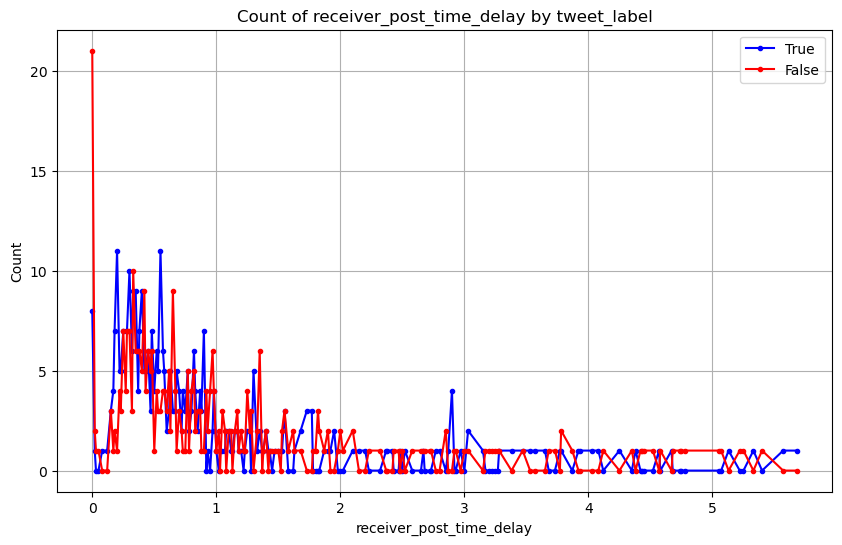

In [19]:
grouped = df_earliest.groupby('tweet_label')['receiver_post_time_delay'].value_counts().unstack(fill_value=0)
plt.figure(figsize=(10, 6))

# Plot for True values
plt.plot(grouped.loc[True].index, grouped.loc[True], marker='.', label='True', color='blue')

# Plot for False values
plt.plot(grouped.loc[False].index, grouped.loc[False], marker='.', label='False', color='red')

plt.xlabel('receiver_post_time_delay')
plt.ylabel('Count')
plt.title('Count of receiver_post_time_delay by tweet_label')
plt.legend()
plt.grid(True)

plt.show()


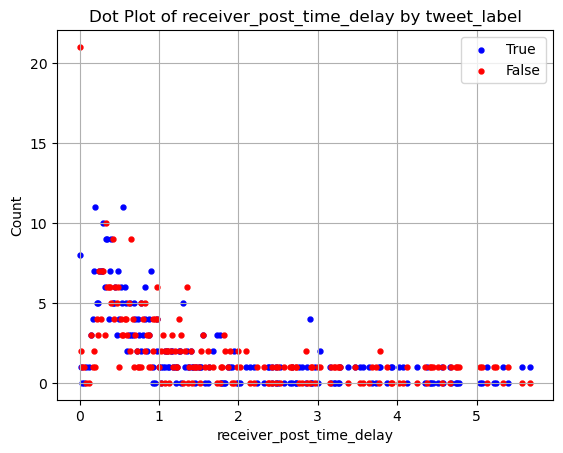

In [20]:
# Group the data by tweet_label and receiver_post_time_delay
grouped = df_earliest.groupby(['tweet_label', 'receiver_post_time_delay']).size().unstack(fill_value=0)

# Create a dot plot for True
plt.scatter(grouped.loc[True].index, grouped.loc[True], label='True', color='blue', marker='.', s=50)

# Create a dot plot for False
plt.scatter(grouped.loc[False].index, grouped.loc[False], label='False', color='red', marker='.', s=50)

plt.xlabel('receiver_post_time_delay')
plt.ylabel('Count')
plt.title('Dot Plot of receiver_post_time_delay by tweet_label')
plt.legend()
plt.grid(True)

plt.show()

In [21]:
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

In [22]:
df_earliest['tweet_label'].value_counts()

True     357
False    342
Name: tweet_label, dtype: int64

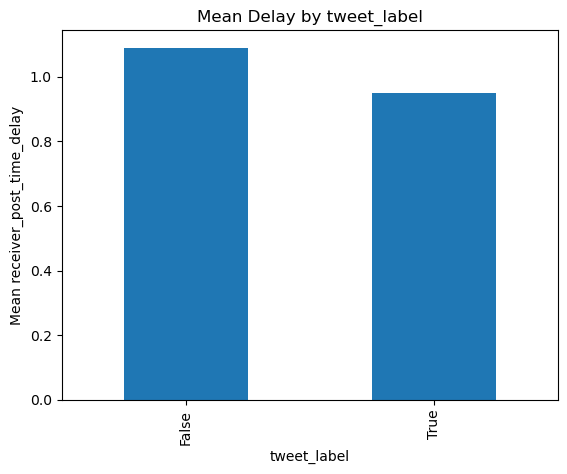

In [23]:
grouped = df_earliest.groupby('tweet_label')['receiver_post_time_delay'].mean()
grouped.plot(kind='bar')
plt.xlabel('tweet_label')
plt.ylabel('Mean receiver_post_time_delay')
plt.title('Mean Delay by tweet_label')
plt.show()

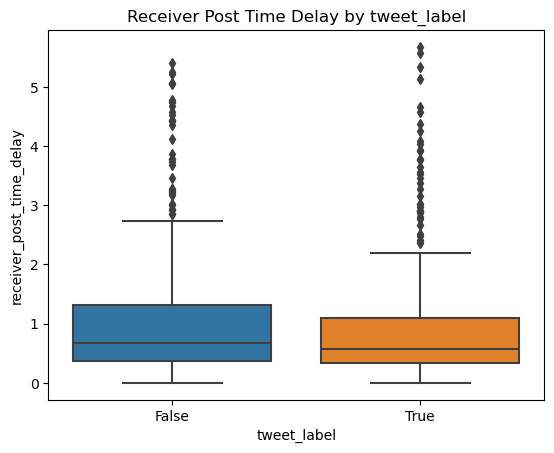

In [24]:
import seaborn as sns

sns.boxplot(x='tweet_label', y='receiver_post_time_delay', data=df_earliest)
plt.xlabel('tweet_label')
plt.ylabel('receiver_post_time_delay')
plt.title('Receiver Post Time Delay by tweet_label')
plt.show()

C:\Users\sanja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sanja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


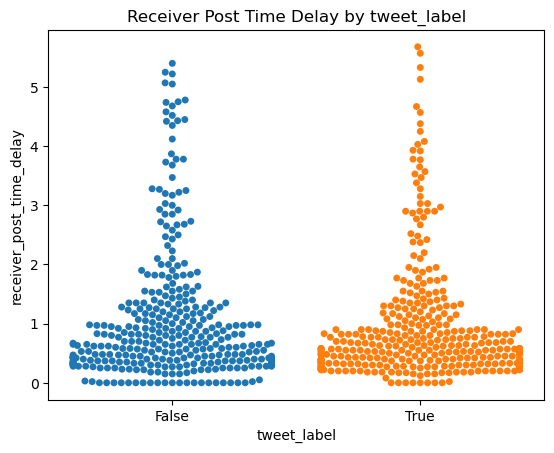

In [25]:
sns.swarmplot(x='tweet_label', y='receiver_post_time_delay', data=df_earliest)
plt.xlabel('tweet_label')
plt.ylabel('receiver_post_time_delay')
plt.title('Receiver Post Time Delay by tweet_label')
plt.show()